In [1]:
import pandas as pd
import os 

In [2]:
aggs_trx = pd.read_csv('agg_transactions.csv')

In [3]:
aggs_user_logs = pd.read_csv('agg_user_logs.csv')

In [4]:
aggs_trx.head()

,msno,total_days_subscribed,total_amount_paid,average_days_subscribed,average_amount_paid,percentage_auto_renew
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,7,0,7.000000,0.0,0.0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,805,3387,402.500000,1693.5,0.0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,150,495,30.000000,99.0,1.0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,603,3129,28.714286,149.0,1.0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,780,4023,28.888889,149.0,1.0


In [5]:
aggs_user_logs.head()

,msno,total_secs_mean,total_secs_sum,num_unq_mean,num_unq_sum
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,7412.483605,563348.754,28.460526,2163
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,6665.326570,3872554.737,25.051635,14555
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,11250.902094,6559275.921,41.360206,24113
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,5269.431311,1406938.160,13.745318,3670
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,3160.614991,1349582.601,14.927400,6374


In [6]:
# This can be changed to the directory where the datasets are stored
data_dir = './data'

# Training data for january, contains two columns : user id and binary churn target variable
train = pd.read_csv(os.path.join(data_dir, 'train.csv'), dtype={'is_churn': str})

train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [7]:
from functools import reduce

In [8]:
uid = "msno"

In [9]:
train.shape

(992931, 2)

In [10]:
members = pd.read_csv(os.path.join(data_dir, "members_cleaned.csv"))

In [11]:
members.head()

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time
0,0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,27.0,male,11,20110911
1,1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,27.0,male,7,20110914
2,2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,27.0,male,11,20110915
3,3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,27.0,male,11,20110915
4,4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32.0,female,9,20110915


In [12]:
members.bd.isnull().agg(['mean', 'sum'])

mean    0.0
sum     0.0
Name: bd, dtype: float64

In [13]:
merged_aggs = reduce(lambda x,y: x.merge(y, how="left", on=uid), [train[[uid]], aggs_user_logs, aggs_trx, members[[uid, 'bd']]])

In [14]:
merged_aggs.shape

(992931, 11)

In [15]:
merged_aggs.head()

,msno,total_secs_mean,total_secs_sum,num_unq_mean,num_unq_sum,total_days_subscribed,total_amount_paid,average_days_subscribed,average_amount_paid,percentage_auto_renew,bd
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,4613.960400,9.227921e+04,19.700000,394.0,37.0,149.0,18.500000,74.500000,0.000000,36.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,5027.913888,2.614515e+06,13.901923,7229.0,603.0,3160.0,28.714286,150.476190,0.952381,38.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,10959.428928,2.597385e+06,48.662447,11533.0,270.0,1343.0,30.000000,149.222222,0.777778,27.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,6779.536436,4.840589e+06,25.130252,17943.0,850.0,1937.0,283.333333,645.666667,0.333333,23.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,25038.428218,1.837821e+07,97.500000,71565.0,875.0,4053.0,97.222222,450.333333,0.000000,27.0


In [16]:
clustering_cols = ['bd', 'total_amount_paid', 'total_days_subscribed', 'num_unq_mean', 'total_secs_mean', 'total_secs_sum']

In [17]:
merged_aggs.isnull().agg(['mean', 'sum'])

,msno,total_secs_mean,total_secs_sum,num_unq_mean,num_unq_sum,total_days_subscribed,total_amount_paid,average_days_subscribed,average_amount_paid,percentage_auto_renew,bd
mean,0.0,0.128103,0.128103,0.128103,0.128103,0.000017,0.000017,0.000017,0.000017,0.000017,0.116594
sum,0.0,127197.000000,127197.000000,127197.000000,127197.000000,17.000000,17.000000,17.000000,17.000000,17.000000,115770.000000


In [18]:
merged_aggs['bd'].fillna(merged_aggs['bd'].median(), inplace=True)

In [19]:
merged_aggs.fillna(0, inplace=True)

In [20]:

from sklearn.cluster import KMeans

In [21]:
dataset = merged_aggs[clustering_cols]

In [22]:
X = dataset.values

In [23]:
#standardize the data to normal distribution
from sklearn import preprocessing
X_std = preprocessing.scale(X)
# X_std = pd.DataFrame(X_std)

In [24]:

# calculate inertia for a range of number of cluster
inertias = []
for i in range(1, 11):
    print(i)
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_std)
    inertias.append(km.inertia_)



1
2
3
4
5
6
7
8
9
10


In [25]:
import matplotlib.pyplot as plt 

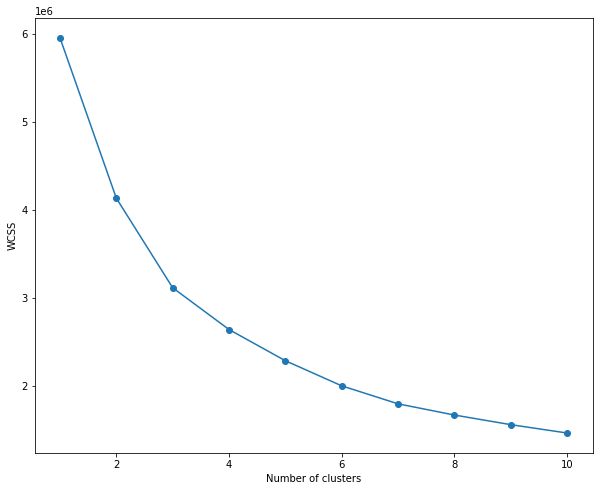

In [26]:
# plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_std)
#beginning of  the cluster numbering with 1 instead of 0

y_kmeans = y_kmeans + 1

# Adding cluster to the Dataset1
dataset['cluster'] = y_kmeans

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset.groupby('cluster').mean(),1))


/home/achraf/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [28]:
kmeans_mean_cluster

,bd,total_amount_paid,total_days_subscribed,num_unq_mean,total_secs_mean,total_secs_sum
cluster,,,,,,
1,27.2,3558.1,721.1,22.2,5604.0,2454292.5
2,26.2,1292.1,308.6,34.2,8706.5,1462997.6
3,28.5,3195.9,639.0,64.7,19949.4,10271162.5
4,44.9,3161.3,599.8,21.2,5656.6,2006351.3
5,26.9,1329.4,360.7,9.2,2073.7,238316.6


In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_std)
dataset['pca-one'] = pca_result[:,0]
dataset['pca-two'] = pca_result[:,1] 
dataset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.48687231 0.28187068 0.15974367]


/home/achraf/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/achraf/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/achraf/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to b

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [32]:
dataset.columns

Index(['bd', 'total_amount_paid', 'total_days_subscribed', 'num_unq_mean',
       'total_secs_mean', 'total_secs_sum', 'cluster', 'pca-one', 'pca-two',
       'pca-three'],
      dtype='object')

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

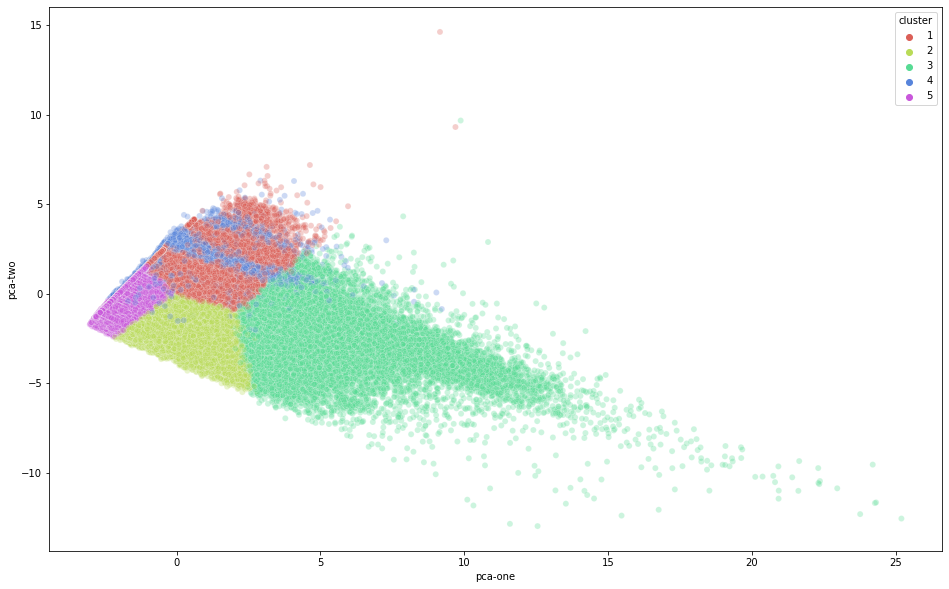

In [33]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="cluster",
    palette=sns.color_palette("hls", dataset['cluster'].nunique()),
    data=dataset,
    legend="full",
    alpha=0.3
)

/home/achraf/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """Entry point for launching an IPython kernel.


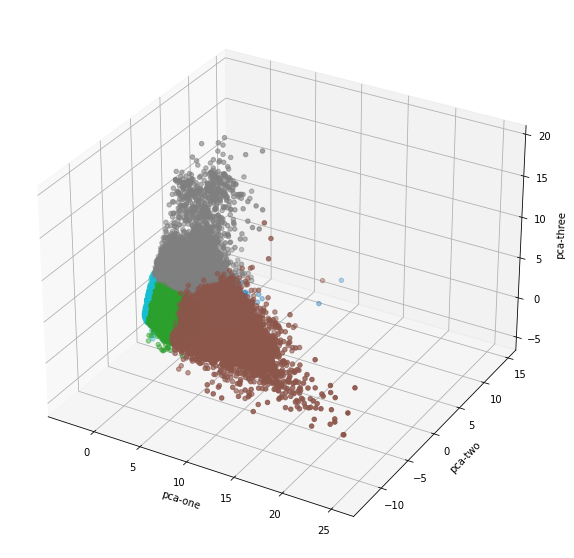

In [34]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dataset["pca-one"], 
    ys=dataset["pca-two"], 
    zs=dataset["pca-three"], 
    c=dataset["cluster"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [70]:
kmeans.cluster_centers_

array([[-0.16094875,  1.00345427,  0.92896743,  0.01236589, -0.01706341,
         0.19083115],
       [-0.34075303, -0.80869784, -0.8437002 ,  0.67303743,  0.55312297,
        -0.14997699],
       [ 0.05300346,  0.71306451,  0.57546552,  2.35540018,  2.63259327,
         2.86238593],
       [ 2.80398231,  0.68644362,  0.40791156, -0.03801818, -0.00728939,
         0.03762261],
       [-0.21136405, -0.7773593 , -0.61819366, -0.70601861, -0.67061129,
        -0.56753578]])

In [75]:
pca.transform(kmeans.cluster_centers_)[:, :2]

array([[ 0.78339142,  1.05014563],
       [-0.12177404, -1.45701278],
       [ 4.35506887, -1.52584772],
       [ 0.64873791,  1.19038372],
       [-1.48030783, -0.24242239]])

In [36]:
y_kmeans

array([5, 4, 2, ..., 5, 5, 5], dtype=int32)

In [37]:
X_std

array([[ 1.30929907, -1.72124611, -2.00893823, -0.12300513, -0.19998383,
        -0.61727589],
       [ 1.64473222,  0.68542303,  0.42186235, -0.44269664, -0.12346692,
         0.24587647],
       [-0.20015011, -0.7668911 , -1.00827298,  1.47391202,  0.97293944,
         0.2400141 ],
       ...,
       [-0.20015011, -1.76041144, -2.03900114, -1.20921403, -1.05284781,
        -0.64885541],
       [-0.20015011, -1.60055298, -1.7813191 , -1.20921403, -1.05284781,
        -0.64885541],
       [-0.20015011, -1.73723196, -2.03900114, -1.20921403, -1.05284781,
        -0.64885541]])

In [38]:
from sklearn.metrics import silhouette_score

In [44]:
import numpy as np

In [59]:
rnd_idx = np.random.choice(X_std.shape[0], int(0.01 * X_std.shape[0]), replace=False)

In [60]:
sample = X_std[rnd_idx, :]

In [61]:
sample_clus = y_kmeans[rnd_idx]

In [62]:
silhouette_score(sample, sample_clus)

0.31621386754414915

In [67]:
pca_df = dataset[['pca-one', 'pca-two']].values

In [68]:
pca_df

array([[-1.70519525, -1.67722473],
       [ 0.41348946,  1.13654425],
       [ 0.633184  , -2.01735073],
       ...,
       [-2.80408537, -1.28038423],
       [-2.65497884, -1.03941237],
       [-2.79525148, -1.26747634]])

For n_clusters = 4 The average silhouette_score is : 0.35823679425002647
For n_clusters = 5 The average silhouette_score is : 0.37175116244917955
For n_clusters = 6 The average silhouette_score is : 0.37416502280753344
For n_clusters = 9 The average silhouette_score is : 0.35806868032386213


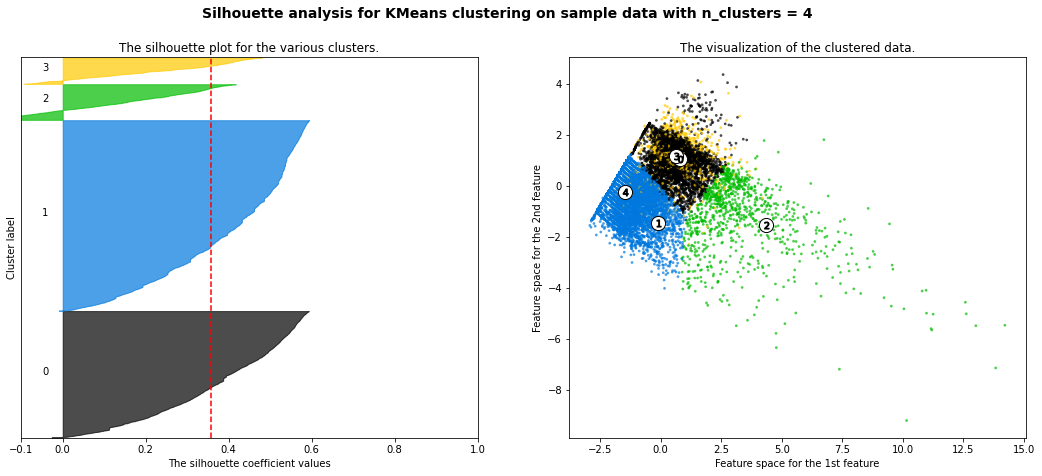

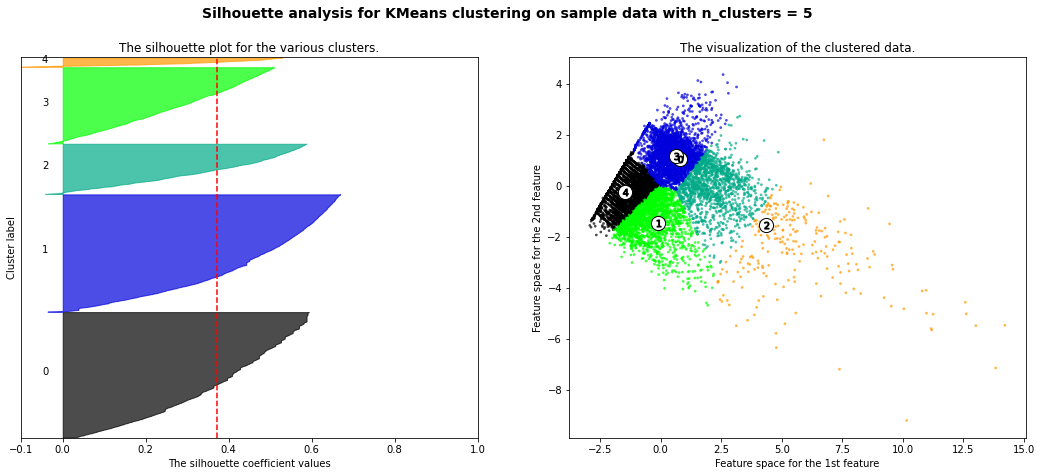

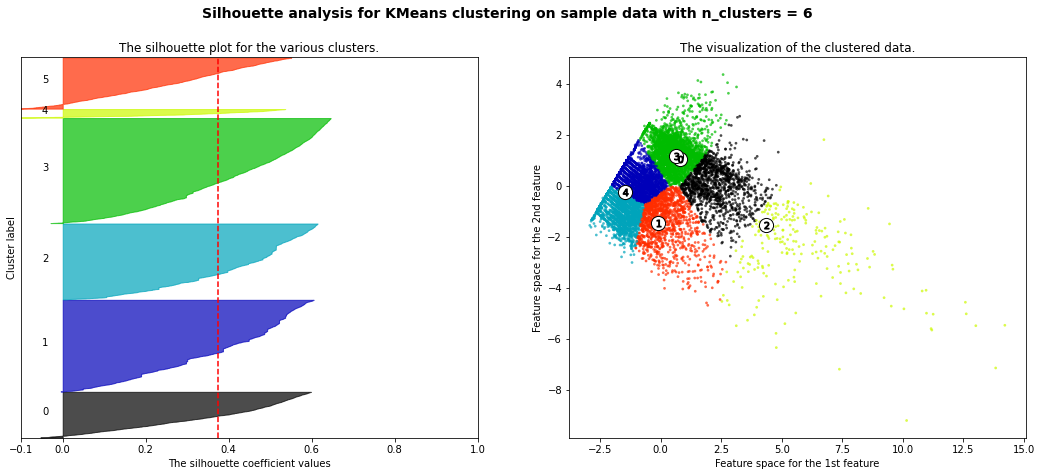

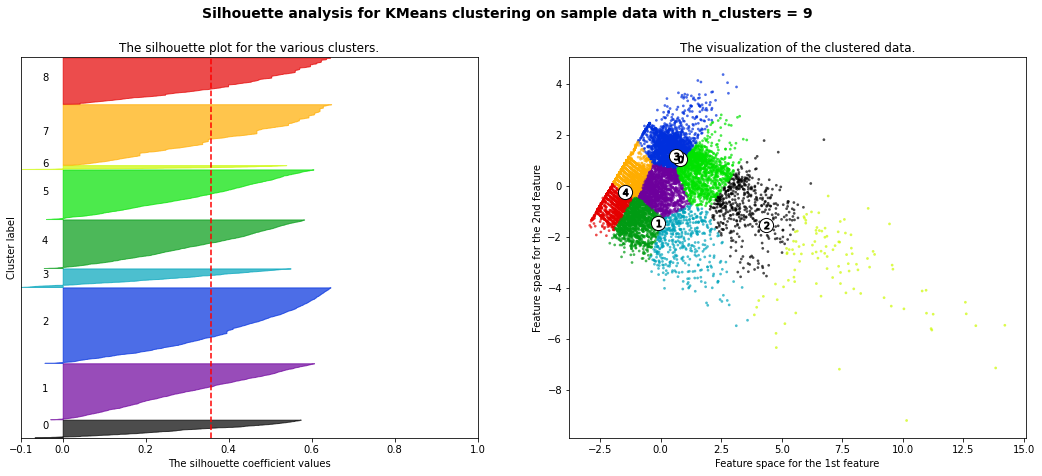

In [77]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
rnd_idx = np.random.choice(X_std.shape[0], int(0.01 * X_std.shape[0]), replace=False)
sample = X_std[rnd_idx, :]
X = sample

range_n_clusters = [4, 5, 6, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    X = pca_df[rnd_idx, :]
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = pca.transform(kmeans.cluster_centers_)[:, :2]
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()